In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline
import statsmodels.stats.weightstats as ssw

In [102]:
maxwell_rv = sts.maxwell()
sample = maxwell_rv.rvs(100)
sample

array([1.46065222, 2.92252857, 0.53752896, 1.60804424, 1.35839978,
       2.06425769, 1.78743639, 0.85016948, 1.95533528, 1.78433024,
       1.42570873, 1.13541229, 1.84781823, 0.59152057, 0.82793915,
       0.70066065, 1.44778312, 0.70610422, 1.29273972, 1.66488529,
       1.52527749, 3.10838268, 1.61957982, 2.15077157, 1.304691  ,
       0.50083554, 0.82464004, 3.19899446, 1.75363982, 1.75191754,
       2.17889741, 2.4157614 , 1.01780377, 0.79401558, 1.27334059,
       1.98079168, 1.66130768, 0.64518996, 1.67447768, 1.91966295,
       1.7752137 , 1.16005993, 2.01871109, 1.76130419, 1.75326433,
       0.68960594, 0.90275925, 2.39046291, 1.03577654, 1.46039698,
       1.54357556, 3.01447049, 1.19077504, 1.77980383, 2.28832908,
       1.08317368, 0.84733554, 0.61837375, 1.23473888, 1.34548387,
       2.22289323, 0.71183373, 1.15434238, 0.63909799, 1.15740855,
       3.15313036, 1.6158229 , 2.71592934, 1.0221591 , 0.81284209,
       1.41623702, 0.88429196, 1.99308758, 0.52860245, 1.46109

In [103]:
sample.dtype

dtype('float64')

In [104]:
real_mean = maxwell_rv.mean() # настоящее среднее случайной величины
real_mean

1.5957691216057308

In [105]:
real_var = maxwell_rv.var() # настоящая дисперсия случайной величины
real_var

0.45352091052967447

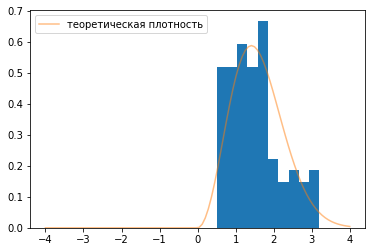

In [106]:
plt.hist(sample, density=True)
x = np.linspace(-4,4,100)
pdf = maxwell_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.legend()

In [107]:
sample_mean = sample.mean() # выборочное среднее
print(sample_mean)
sample_var = sample.var() # выборочная дисперсия
print(sample_var)

1.5240794442876802
0.46509399097226983


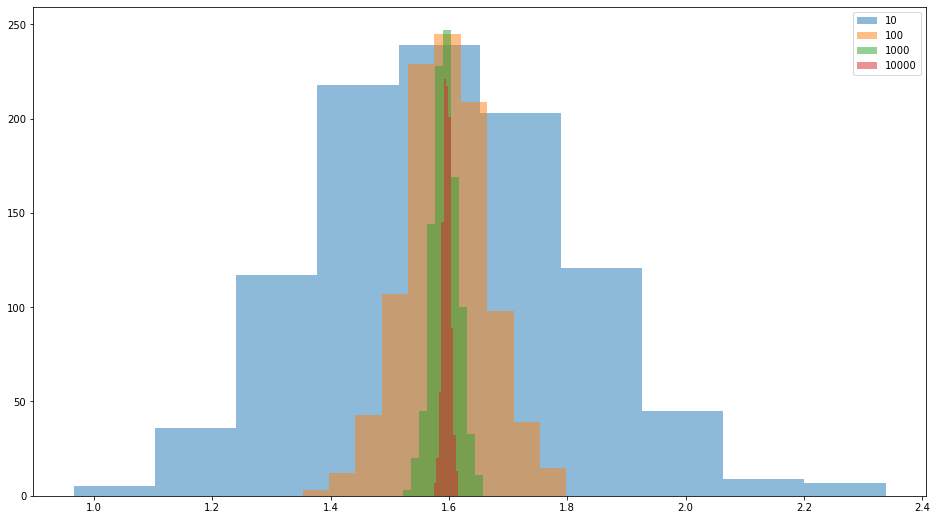

In [108]:
plt.figure(figsize=(16,9))

for N in [10, 100, 1000, 10000]:
    means = []
    for i in range(1000):
         means.append(np.mean(maxwell_rv.rvs(N)))
    plt.hist(means, alpha=0.5)

    
    
plt.legend(['10', '100', '1000', '10000'])
plt.show()


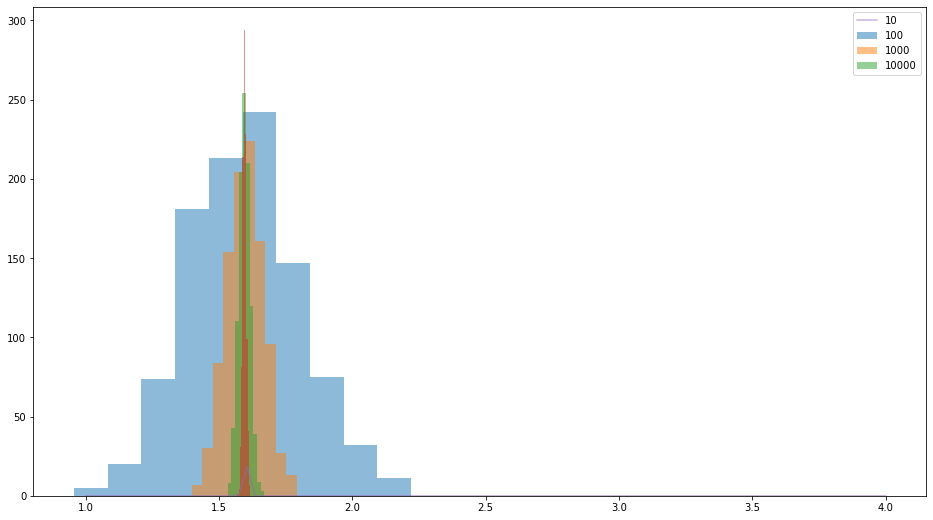

In [112]:
plt.figure(figsize=(16,9))
# сгенерируем много выборочных средних
for N in [10, 100, 1000, 10000]:
    means = []
    for i in range(1000):
         means.append(np.mean(maxwell_rv.rvs(N)))
    plt.hist(means, alpha=0.5)

norm_rv = sts.norm(loc=maxwell_rv.mean(), scale=maxwell_rv.std() / np.sqrt(N))

x = np.linspace(1,4, 100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='Теоретическая плотность', alpha=0.5)
 
    
plt.legend(['10', '100', '1000', '10000'])
plt.show()



In [13]:
url ="https://raw.githubusercontent.com/piton1/DS/Lesson_5/telecom_churn.csv"
df=pd.read_csv(url)
df
dx = df[["total day calls", "churn"]].dropna()
dx.rename(columns = {'total day calls' : 'TDC'}, inplace = True)
dx_False = dx[(dx['churn'] == False)]
dx_True = dx[(dx['churn'] == True)]
print(f"Доверительный интервал. Явная формула(Остался): {sts.norm.interval(alpha=0.95, loc=np.mean(dx_False['TDC']), scale=np.std(dx_False['TDC'], ddof=1)/np.sqrt(len(dx_False['TDC'] - 1)))}")
print(f"Доверительный интервал. Функция (Остался): {ssw._zconfint_generic(np.mean(dx_False['TDC']),  np.std(dx_False['TDC'], ddof=1), alpha=0.95, alternative='two-sided')}")
print(f"Доверительный интервал. Явная формула(Ушел): {sts.norm.interval(alpha=0.95, loc=np.mean(dx_True['TDC']), scale=np.std(dx_True['TDC'], ddof=1)/np.sqrt(len(dx_True['TDC'] - 1)))}")
print(f"Доверительный интервал. Функция (Ушел): {ssw._zconfint_generic(np.mean(dx_True['TDC']),  np.std(dx_True['TDC'], ddof=1), alpha=0.95, alternative='two-sided')}")

Доверительный интервал. Явная формула(Остался): (99.55618833318324, 101.01012745629045)
Доверительный интервал. Функция (Остался): (99.04149114274125, 101.52482464673244)
Доверительный интервал. Явная формула(Ушел): (99.41066229112079, 103.26014516229537)
Доверительный интервал. Функция (Ушел): (99.98204678079553, 102.68876067262063)
